In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import joblib

In [208]:
rainfall = pd.read_csv("C:/Users/chand/OneDrive/Desktop/codegood/cpp/demo/hello/rainfall/datarainfall.csv")
pd.set_option("display.max_columns", None)
rainfall

,YEAR,MO,DY,T2M,T2MDEW,TS,T2M_MAX,T2M_MIN,QV2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,RAIN
0,2000,1,1,16.03,8.38,15.29,24.26,9.62,6.77,0.00,101.46,3.05,210.44,4.48,210.75,NO
1,2000,1,2,15.86,7.96,14.73,24.20,8.23,6.65,0.00,101.41,2.95,340.94,4.20,341.31,NO
2,2000,1,3,15.30,7.44,14.51,23.92,7.94,6.41,0.00,101.30,3.15,338.06,4.65,338.50,NO
3,2000,1,4,15.37,6.53,14.16,24.12,7.37,5.98,0.00,101.33,3.14,339.81,4.50,339.94,NO
4,2000,1,5,14.84,6.35,14.02,23.67,7.01,5.92,0.00,101.37,3.05,338.69,4.51,339.06,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8335,2022,10,27,25.22,20.35,24.69,29.84,20.29,14.77,0.02,101.18,1.83,271.69,2.61,271.88,YES
8336,2022,10,28,23.77,19.80,23.49,28.88,19.48,14.28,0.01,101.14,2.47,169.31,3.84,169.94,YES
8337,2022,10,29,22.88,18.63,22.51,28.65,17.46,13.31,0.00,101.13,2.49,337.44,3.67,337.88,NO
8338,2022,10,30,23.44,20.13,23.51,29.55,17.94,14.65,0.02,101.13,2.34,332.00,3.78,317.75,YES


In [209]:
rainfall.head()

,YEAR,MO,DY,T2M,T2MDEW,TS,T2M_MAX,T2M_MIN,QV2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M,RAIN
0,2000,1,1,16.03,8.38,15.29,24.26,9.62,6.77,0.0,101.46,3.05,210.44,4.48,210.75,NO
1,2000,1,2,15.86,7.96,14.73,24.20,8.23,6.65,0.0,101.41,2.95,340.94,4.20,341.31,NO
2,2000,1,3,15.30,7.44,14.51,23.92,7.94,6.41,0.0,101.30,3.15,338.06,4.65,338.50,NO
3,2000,1,4,15.37,6.53,14.16,24.12,7.37,5.98,0.0,101.33,3.14,339.81,4.50,339.94,NO
4,2000,1,5,14.84,6.35,14.02,23.67,7.01,5.92,0.0,101.37,3.05,338.69,4.51,339.06,NO


In [210]:
rainfall.shape

(8340, 16)

In [211]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8340 entries, 0 to 8339
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         8340 non-null   int64  
 1   MO           8340 non-null   int64  
 2   DY           8340 non-null   int64  
 3   T2M          8340 non-null   float64
 4   T2MDEW       8340 non-null   float64
 5   TS           8340 non-null   float64
 6   T2M_MAX      8340 non-null   float64
 7   T2M_MIN      8340 non-null   float64
 8   QV2M         8340 non-null   float64
 9   PRECTOTCORR  8340 non-null   float64
 10  PS           8340 non-null   float64
 11  WS10M        8340 non-null   float64
 12  WD10M        8340 non-null   float64
 13  WS50M        8340 non-null   float64
 14  WD50M        8340 non-null   float64
 15  RAIN         8340 non-null   object 
dtypes: float64(12), int64(3), object(1)
memory usage: 1.0+ MB


In [212]:
rainfall.describe()

,YEAR,MO,DY,T2M,T2MDEW,TS,T2M_MAX,T2M_MIN,QV2M,PRECTOTCORR,PS,WS10M,WD10M,WS50M,WD50M
count,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000,8340.000000
mean,2010.918825,6.486331,15.729856,25.840222,19.968066,25.973187,31.276089,21.280185,15.610339,4.361100,100.684500,3.209982,212.267299,4.636342,212.316962
std,6.590756,3.434716,8.800737,4.999786,6.390905,5.623798,4.826744,6.234786,5.376714,9.376136,0.618648,1.355390,65.230002,1.755732,64.930119
min,2000.000000,1.000000,1.000000,10.900000,-0.810000,11.220000,16.850000,3.440000,3.600000,0.000000,98.680000,0.570000,8.750000,0.820000,9.000000
25%,2005.000000,4.000000,8.000000,22.210000,15.140000,21.817500,28.260000,16.130000,10.800000,0.000000,100.180000,2.250000,174.250000,3.380000,174.485000
50%,2011.000000,7.000000,16.000000,27.650000,21.990000,27.650000,30.950000,24.510000,16.600000,0.350000,100.680000,2.900000,204.380000,4.410000,205.120000
75%,2017.000000,9.000000,23.000000,29.170000,25.720000,29.600000,34.130000,26.320000,20.750000,4.992500,101.230000,3.950000,256.880000,5.730000,256.652500
max,2022.000000,12.000000,31.000000,36.900000,27.820000,38.700000,46.810000,30.350000,23.680000,171.860000,102.030000,12.830000,352.120000,16.630000,352.440000


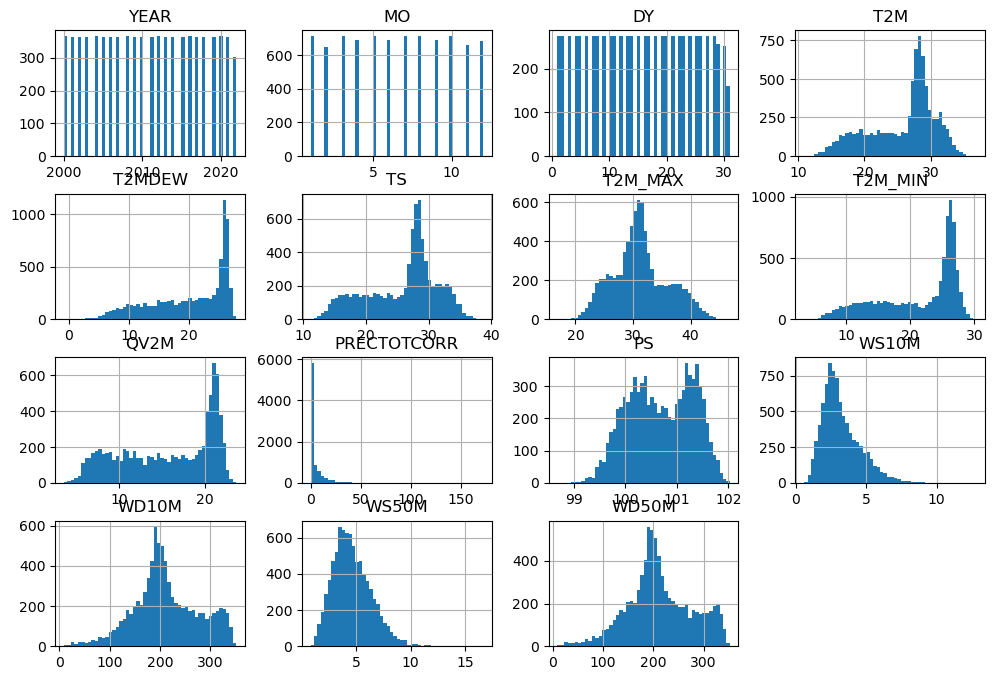

In [213]:
rainfall.hist(bins=50, figsize=(12, 8))
plt.show()


In [214]:
def shuffle_and_split_data(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [215]:
train_set, test_set = shuffle_and_split_data(rainfall, 0.2)

In [216]:
len(test_set)

1668

In [217]:
len(train_set)

6672

C:\Users\chand\AppData\Local\Temp\ipykernel_8316\355576156.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = rainfall.corr(method = "spearman")


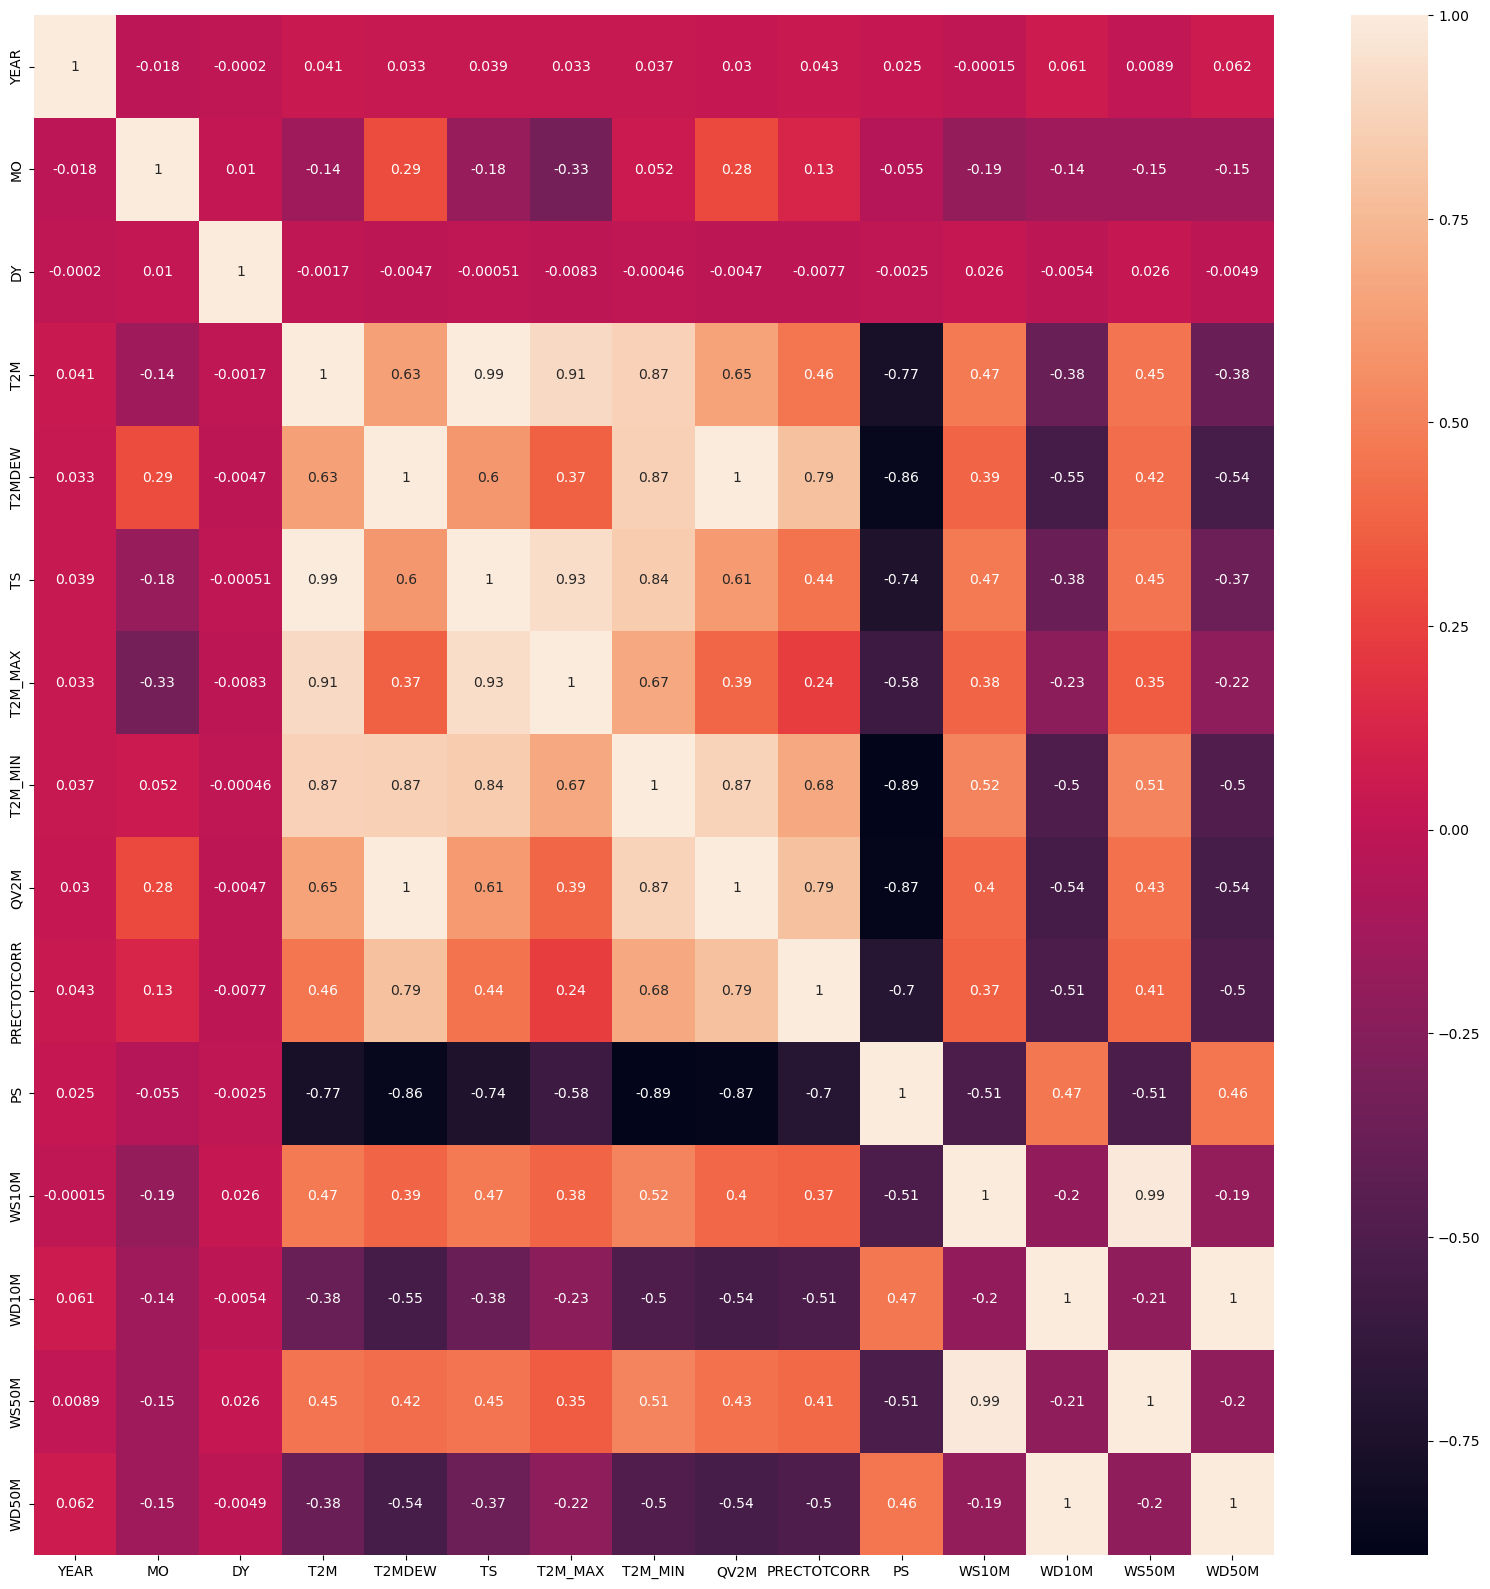

In [218]:
corrmat = rainfall.corr(method = "spearman")
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True)

In [219]:
features = list(rainfall.select_dtypes(include = np.number).columns)
features.remove('DY')
features.remove('MO')
features.remove('YEAR')
print(features)

['T2M', 'T2MDEW', 'TS', 'T2M_MAX', 'T2M_MIN', 'QV2M', 'PRECTOTCORR', 'PS', 'WS10M', 'WD10M', 'WS50M', 'WD50M']


C:\Users\chand\AppData\Local\Temp\ipykernel_8316\611957720.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,4, i + 1)


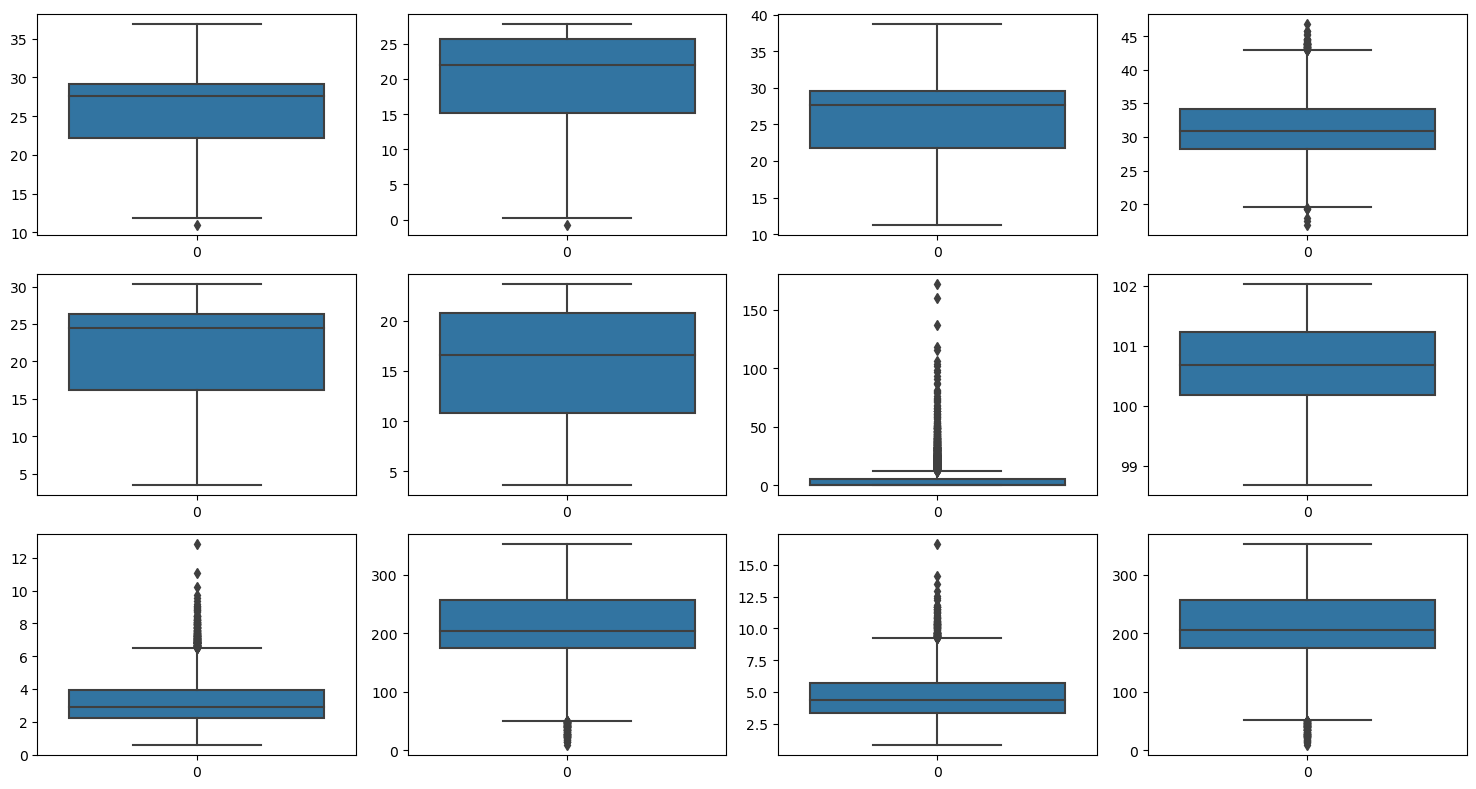

In [220]:
plt.subplots(figsize=(15,8))
 
for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sns.boxplot(rainfall[col])
plt.tight_layout()
plt.show()

In [221]:
target = rainfall.RAIN

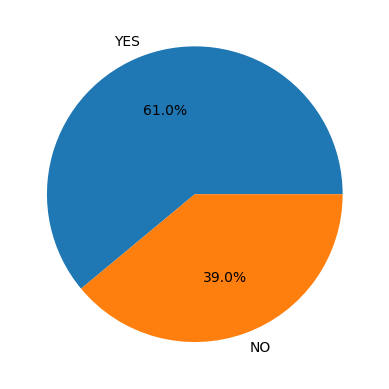

In [222]:
plt.pie(rainfall['RAIN'].value_counts().values,
        labels = rainfall['RAIN'].value_counts().index,
        autopct='%1.1f%%')
plt.show()

In [223]:
rainfall.replace({'YES':1, 'NO':0}, inplace=True)

In [224]:
target = rainfall.RAIN

In [225]:
features = rainfall.drop(['DY', 'RAIN', 'PRECTOTCORR' , 'YEAR'], axis=1)
target = rainfall.RAIN

In [226]:
X_train, X_val, Y_train, Y_val = train_test_split(features,
                                                  target,
                                                  test_size = 0.2,
                                                  stratify = target,
                                                  random_state=2)
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=22)
X, Y = ros.fit_resample(X_train,Y_train)

In [227]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [228]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)]
 
for i in range(3):
  models[i].fit(X, Y)
 
  print(f'{models[i]} : ')
 
  train_preds = models[i].predict_proba(X)
  print('Training Accuracy : ', metrics.roc_auc_score(Y, train_preds[:,1]))
 
  val_preds = models[i].predict_proba(X_val)
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, val_preds[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.9586489119232982
Validation Accuracy :  0.9628668580927913

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) : 
Training Accuracy :  0.9998223287311689
Validation Accuracy :  0.9577693818951187

SVC(probability=True) : 
Training Accuracy :  0.9541748

In [229]:

print(models[2].predict([[1,20.87,12.29,19.74,28.66,13.1,8.85,101.12,1.47,254.75,2.01,253.88]]))

[1]


In [230]:

y_pred = models[2].predict(X_val)
print(confusion_matrix(Y_val,y_pred))

[[588  62]
 [106 912]]
